In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import keras
from keras.applications.vgg16 import VGG16

img = 'examples/cat_dog.jpg'

Using TensorFlow backend.


In [3]:
vgg16 = VGG16(include_top=True, weights='imagenet', classes=1000)

Instructions for updating:
Colocations handled automatically by placer.


Predicted class:
bull_mastiff (n02108422) with probability 0.41
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool 

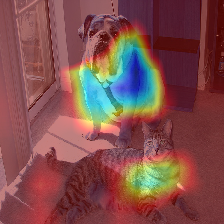

In [4]:
import eli5

assert 'not supported' in eli5.explain_weights(vgg16).error # not available
p = eli5.explain_prediction(vgg16, img)
# print(p)
# assert p == eli5.explain_prediction_keras(vgg16, img) # FXIME: same as eli5.explain_prediction

o = eli5.formatters.format_as_image(p) # image output
print(type(o))
o

import tensorflow as tf
import numpy as np
a = np.array([2, 3])
b = np.array([4, 5])
with tf.Session().as_default():
    print(tf.multiply(a, b).eval())
print(a*b)